Advertising Sales Channel Prediction

In [1]:
import pandas as pd
Advertising=pd.read_csv("Advertising.csv",sep=",") #reading Advertising.csv file
Advertising.head() #Looking into top 5 rows

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
Advertising.shape #Checking the shape of our data

(200, 5)

In [3]:
Advertising.dtypes #Checking the datatype of each attribute

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
#Chnaging the name of Unnamed:0 column to ID
Advertising.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [7]:
#Making ID as an Index
Advertising.set_index('id', inplace=True)

In [8]:
Advertising.shape #Checking the shape of our data

(200, 4)

In [9]:
Advertising.head() #Looking into top 5 rows

,TV,radio,newspaper,sales
id,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


As per problem statement Target variable i.e. sales is float64 i.e. continuous value so we'll use Regression to learn our model.

EDA

Univariate Analysis

C:\Users\SALMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


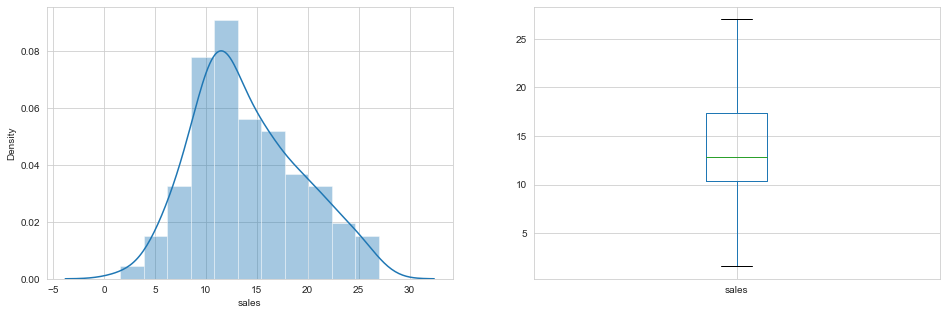

<Figure size 1440x504 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.subplot(121)
sns.distplot(Advertising['sales'])
plt.subplot(122)
Advertising['sales'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

C:\Users\SALMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


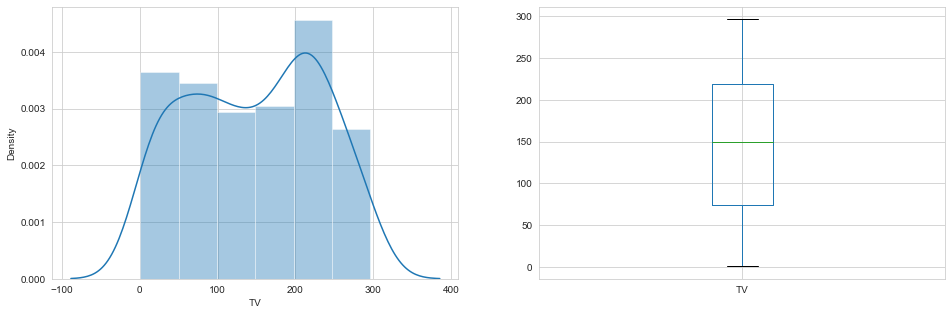

<Figure size 1440x504 with 0 Axes>

In [16]:
plt.subplot(121)
sns.distplot(Advertising['TV'])
plt.subplot(122)
Advertising['TV'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

C:\Users\SALMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


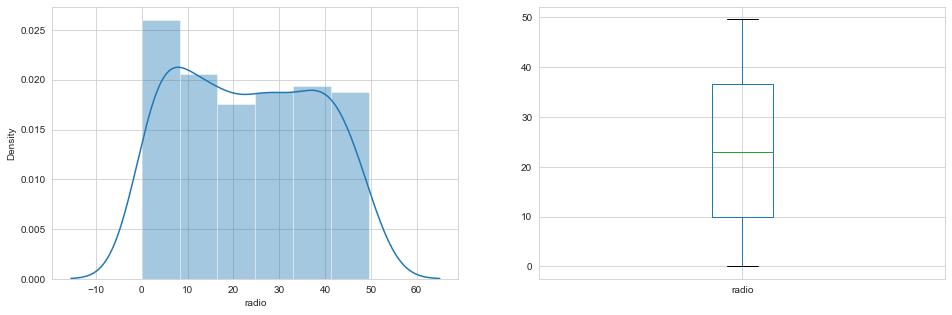

<Figure size 1440x504 with 0 Axes>

In [17]:
plt.subplot(121)
sns.distplot(Advertising['radio'])
plt.subplot(122)
Advertising['radio'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

C:\Users\SALMA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


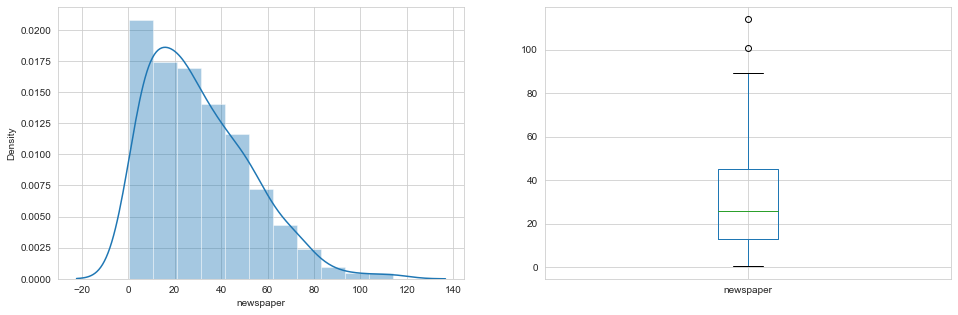

<Figure size 1440x504 with 0 Axes>

In [18]:
plt.subplot(121)
sns.distplot(Advertising['newspaper'])
plt.subplot(122)
Advertising['newspaper'].plot.box(figsize=(16,5))
sns.set_style("whitegrid")
plt.figure(figsize = (20,7))
plt.show()

Bi-variate Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

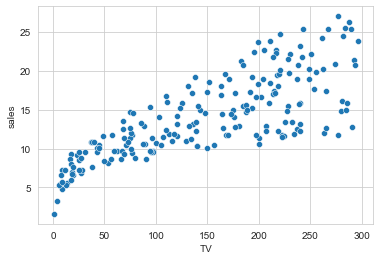

In [19]:
sns.scatterplot(x = 'TV', y = 'sales', data = Advertising)

Number of TV we'll sale more, Sales will Increase.

<AxesSubplot:xlabel='radio', ylabel='sales'>

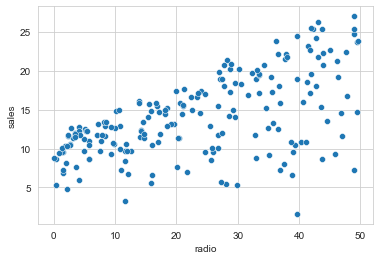

In [21]:
sns.scatterplot(x = 'radio', y = 'sales', data = Advertising)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

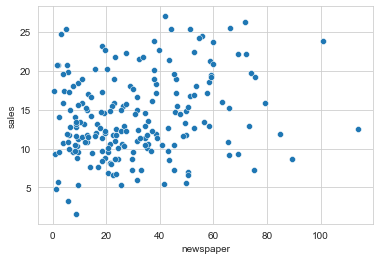

In [22]:
sns.scatterplot(x = 'newspaper', y = 'sales', data = Advertising)

Multi-Variate Analysis

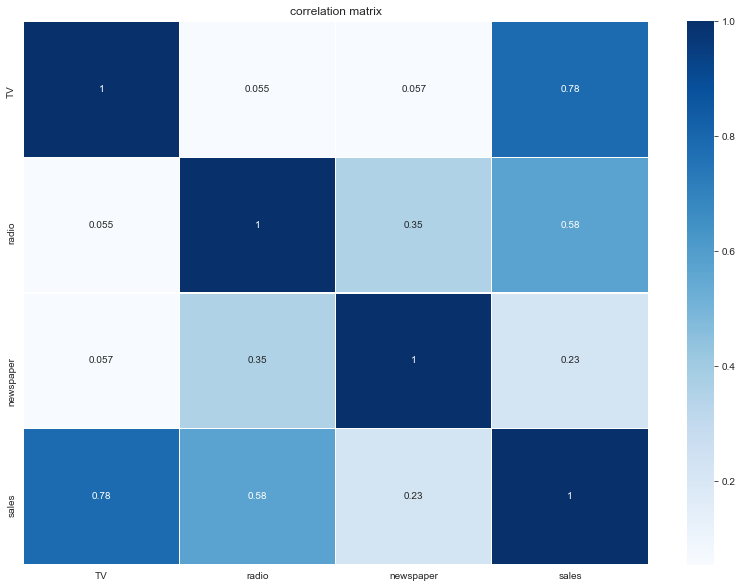

In [23]:
fig=plt.figure(figsize=(14,10))
hc=Advertising.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Tv and radio are heighly corelated with sales

<AxesSubplot:ylabel='id'>

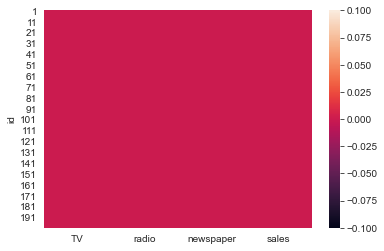

In [26]:
import seaborn as sns
sns.heatmap(Advertising.isnull()) #Looking for null values if any, in heatmap

No null values

Removing Outliers and Skewness

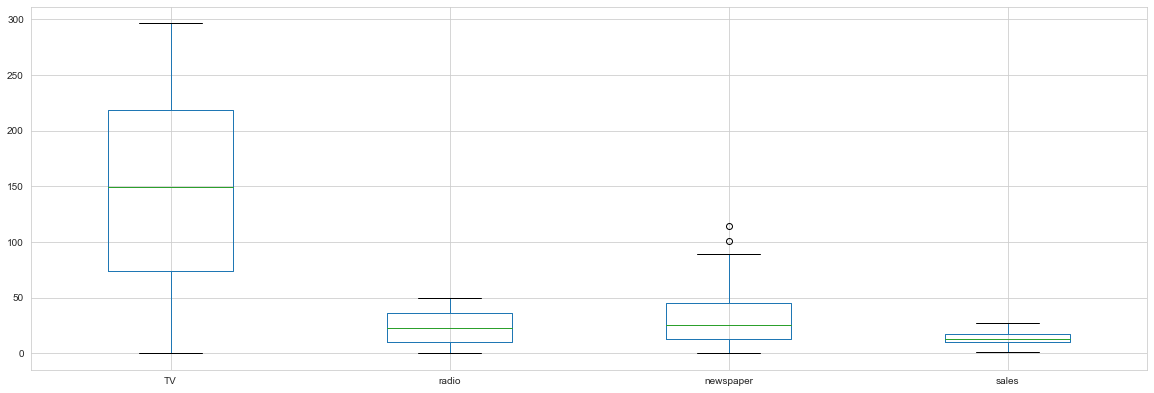

In [27]:
#Checking the outliers again
import matplotlib.pyplot as plt
import seaborn as sns
Advertising.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

No outliers

In [29]:
Advertising.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Skewness of Newspaper is a bit high need to fix it.

In [30]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
Advertising['newspaper'] = np.sqrt(Advertising['newspaper'])

In [31]:
Advertising.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

Seperating Input and Output Variables

In [32]:
x=Advertising.iloc[:,:-1]
y=Advertising.iloc[:,-1:]

In [33]:
x.shape

(200, 3)

In [34]:
y.shape

(200, 1)

In [35]:
import numpy as np
y=np.ravel(y)

In [36]:
y.shape

(200,)

Finding Best Random State

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.9398730445155545  on Random_state  154


Train Test Split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Finding Best Algorithm

In [39]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [40]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [41]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.9398730445155545
Mean Absolute Error:      1.0805921424497602
Mean Squared error:       1.878175520289055
Root Mean Squared Error:  1.3704654392902635
[0.87809171 0.91744186 0.92982697 0.81591747 0.89538764]
0.8873331295445761
Difference between R2 score and cross validatio score is -  0.05253991497097843
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.9865963610086704
Mean Absolute Error:      0.5038000000000011
Mean Squared error:       0.41868720000000026
Root Mean Squared Error:  0.6470604299445302

Random Forest Regressor have height Accuracy and Cross validation score i.e. 98.5%

Hyper Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [44]:
clf_pred=clf.best_estimator_.predict(x_test)

In [45]:
r2_score(y_test, clf_pred)

0.9845598781281961

Saving the model

In [46]:
import joblib
joblib.dump(clf.best_estimator_,"PJ6_Advertising.obj")
RF_from_joblib=joblib.load('PJ6_Advertising.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([15.7633, 10.5758,  4.8984, 23.1134,  9.6181, 17.5147, 19.7401,
       22.3876,  7.5241, 15.2553, 17.793 , 16.661 , 10.4606, 15.115 ,
       10.2331, 14.7441, 18.431 , 15.3639, 10.0568, 16.2975,  6.4768,
       19.8752, 11.4182, 11.3389, 11.4316, 25.0374, 16.7414, 10.1238,
       19.4219,  8.9411, 18.7769, 22.1617, 11.5272,  6.0859, 16.6023,
        8.1415, 14.8691, 24.1632,  8.5441, 12.7664, 13.5041, 10.5589,
       24.628 ,  9.289 ,  7.2355, 18.6763,  7.5143,  9.607 ,  9.6988,
       16.3139, 21.5207, 15.3565,  7.0081, 12.8391, 15.7832, 16.0085,
       25.0879, 21.2   , 14.2788, 13.2794])

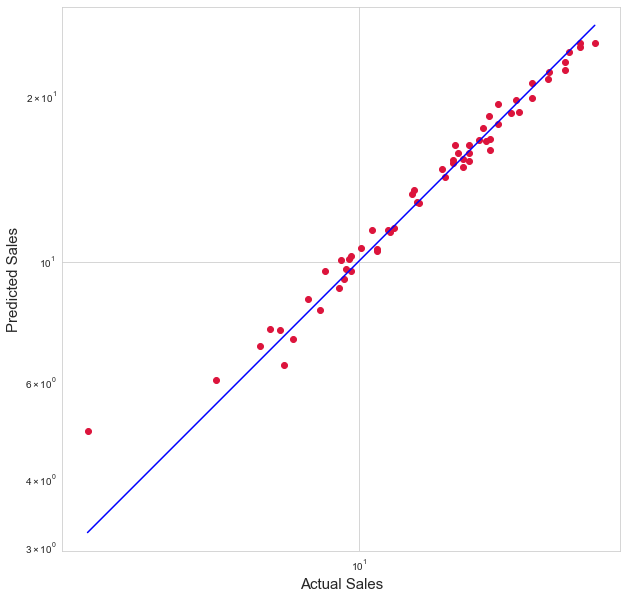

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sales', fontsize=15)
plt.ylabel('Predicted Sales', fontsize=15)
plt.axis('equal')
plt.show()